# Assignment 4

## Question 1: Frequency Domain Sharpening (Highpass Filtering)

In this notebook, I(Aimal Khan) apply three types of highpass filters in the frequency domain to sharpen a grayscale image and compare their effects.


## Explanation

-   Highpass filters allow high frequencies (edges, fine details) and block low frequencies (smooth areas).
-   We use three highpass filters:
    1. Ideal Highpass Filter (IHPF): sharp cutoff, blocks low frequencies below cutoff.
    2. Butterworth Highpass Filter (BHPF): smooth cutoff, order=2.
    3. Gaussian Highpass Filter (GHPF): smoothest cutoff.
-   After filtering in frequency domain, inverse FFT reconstructs the sharpened images.
-   We'll compare sharpening effects and noise amplification.


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load the grayscale image
image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not found or unable to open.")
    exit()

### Get image size and center

We find the number of rows and columns, then calculate the center point of the image.
This center is used to center the frequency transform.


In [8]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

### Compute Fourier transform and shift zero frequency to center

This converts the image into the frequency domain and centers the low frequencies.


In [9]:
dft = np.fft.fft2(image)
dft_shift = np.fft.fftshift(dft)

### Create frequency grid matching image size

We create coordinate grids for frequency components, ensuring they match the image size exactly.
This avoids shape mismatch errors later.


In [10]:
u = np.arange(-ccol, cols - ccol)
v = np.arange(-crow, rows - crow)
U, V = np.meshgrid(u, v)
D = np.sqrt(U**2 + V**2)

### Define cutoff frequency and create highpass filters

-   Cutoff frequency `D0 = 50` is set.
-   Create Ideal, Butterworth (order=2), and Gaussian highpass filters using the distance grid.


In [11]:
D0 = 50
IHPF = np.ones_like(D)
IHPF[D <= D0] = 0

n = 2
BHPF = 1 / (1 + (D0 / (D + 1e-6))**(2 * n))  # small epsilon added to avoid division by zero

GHPF = 1 - np.exp(-(D**2) / (2 * (D0**2)))

### Apply highpass filters in frequency domain

Multiply the shifted Fourier transform of the image by each highpass filter mask.


In [12]:
filtered_IHPF = dft_shift * IHPF
filtered_BHPF = dft_shift * BHPF
filtered_GHPF = dft_shift * GHPF

### Define inverse FFT function

This function shifts the frequency data back and converts it from frequency domain to image domain.


In [13]:
def inverse_fft(filtered):
    f_ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = np.uint8(np.clip(img_back, 0, 255))
    return img_back

### Get sharpened images by applying inverse FFT

We reconstruct the sharpened spatial images from the filtered frequency data.


In [14]:
img_IHPF = inverse_fft(filtered_IHPF)
img_BHPF = inverse_fft(filtered_BHPF)
img_GHPF = inverse_fft(filtered_GHPF)

### Original Image and Spectrum

Original grayscale image and its magnitude spectrum in frequency domain.


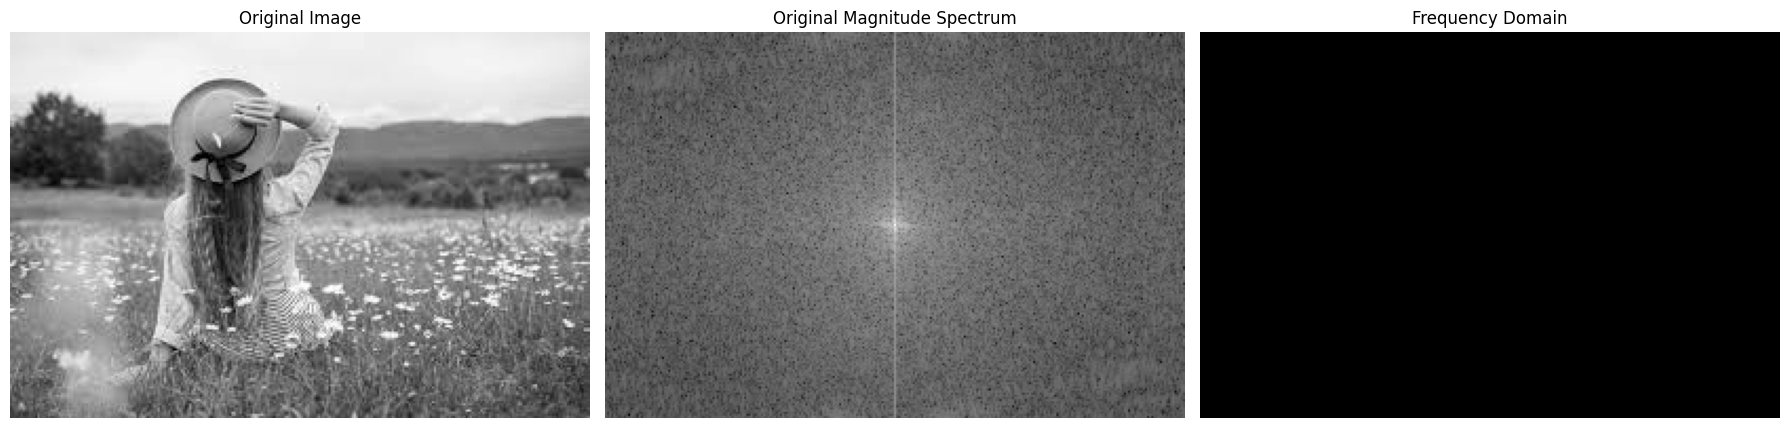

In [15]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(dft_shift)), cmap='gray')
plt.title('Original Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(np.zeros_like(image), cmap='gray')  # blank
plt.title('Frequency Domain')
plt.axis('off')

plt.tight_layout()
plt.show()

### Ideal Highpass Filter (IHPF)

-   Sharp cutoff: blocks low frequencies inside cutoff.
-   Enhances edges but may amplify noise and cause ringing artifacts.
    Below: filtered image, filtered magnitude spectrum, filter mask.


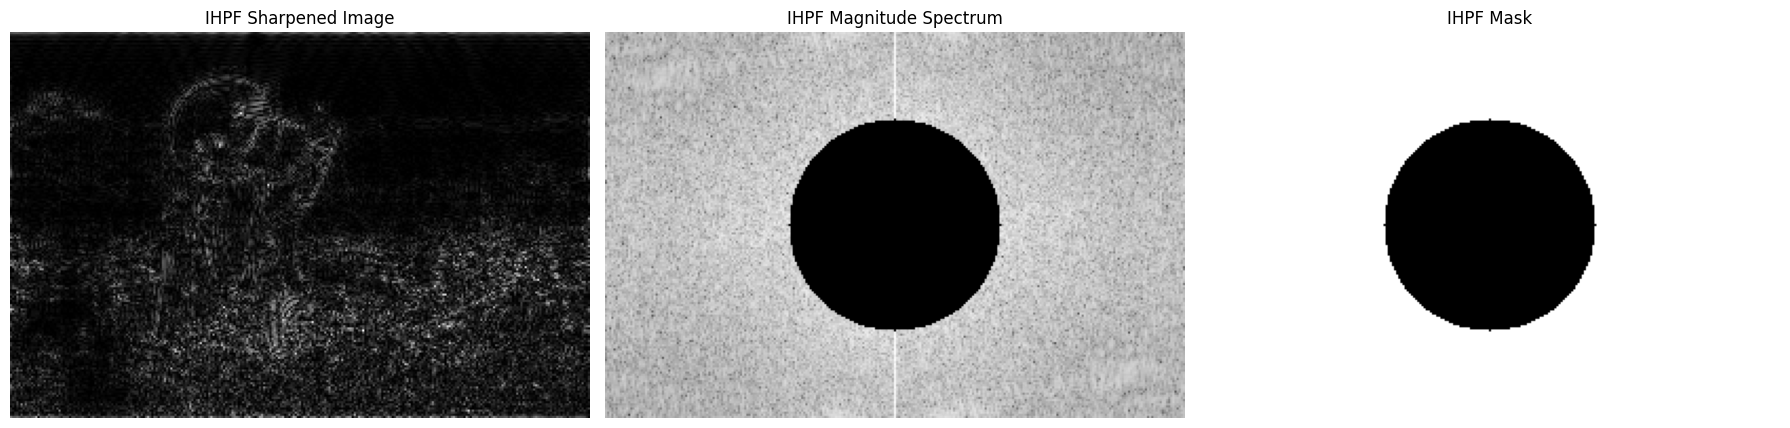

In [16]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_IHPF, cmap='gray')
plt.title('IHPF Sharpened Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(filtered_IHPF)), cmap='gray')
plt.title('IHPF Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(IHPF, cmap='gray')
plt.title('IHPF Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

### Butterworth Highpass Filter (BHPF), Order=2

-   Smooth cutoff reduces ringing.
-   Good balance between sharpening edges and avoiding noise.
    Below: filtered image, spectrum, mask.


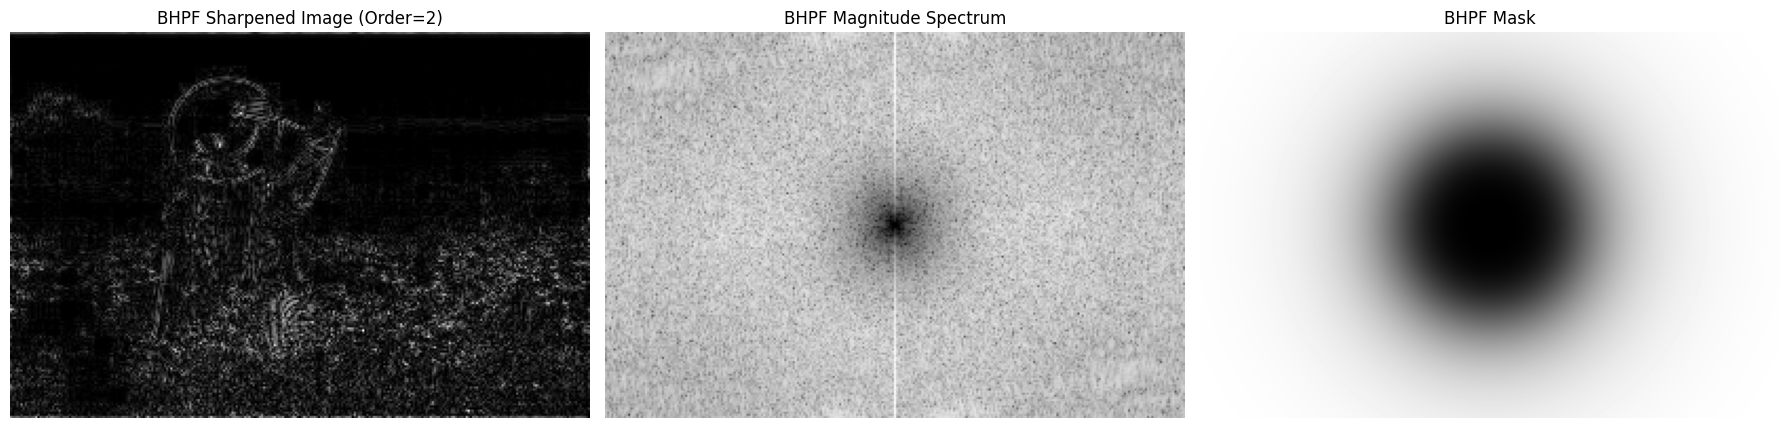

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_BHPF, cmap='gray')
plt.title('BHPF Sharpened Image (Order=2)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(filtered_BHPF)), cmap='gray')
plt.title('BHPF Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(BHPF, cmap='gray')
plt.title('BHPF Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

### Gaussian Highpass Filter (GHPF)

-   Smoothest filter, best edge preservation.
-   Slight blurring but minimal noise amplification.
    Below: filtered image, spectrum, mask.


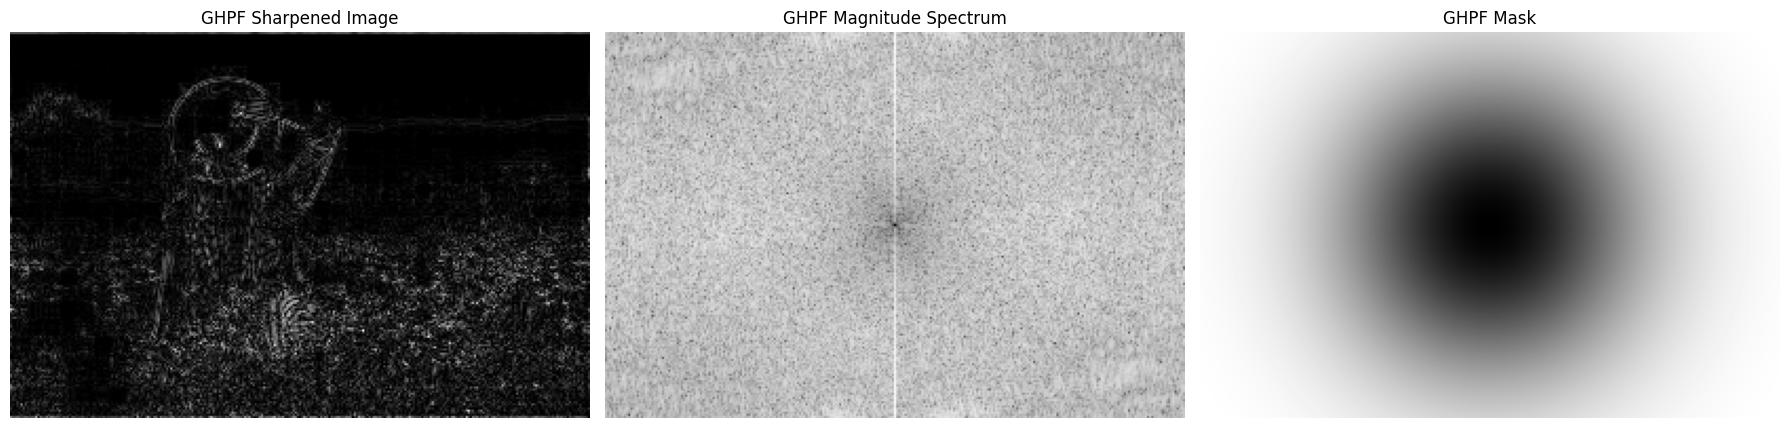

In [18]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_GHPF, cmap='gray')
plt.title('GHPF Sharpened Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(filtered_GHPF)), cmap='gray')
plt.title('GHPF Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(GHPF, cmap='gray')
plt.title('GHPF Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

## Summary Analysis

-   IHPF produces sharp edges but can cause ringing and noise amplification.
-   BHPF smooths the transition, reducing artifacts while sharpening well.
-   GHPF provides the smoothest result, best for edge preservation with minimal noise.
-   For practical sharpening, Butterworth or Gaussian highpass filters are preferred.
